In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import os
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv('predictive_maintenance.csv')

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
print(f"Dataset berhasil dimuat: {df.shape[0]} baris, {df.shape[1]} kolom")
print("-" * 60)
print("First 5 records:")
print(df.head())

# Cek nama kolom sebenarnya
print("\nColumn Names:")
print(df.columns.tolist())
print("Dataset Information:")
df.info()
print("Missing Values Check (Count per Column):")
print(df.isnull().sum())

Dataset berhasil dimuat: 10000 baris, 10 kolom
------------------------------------------------------------
First 5 records:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0         


Statistik Deskriptif:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.00

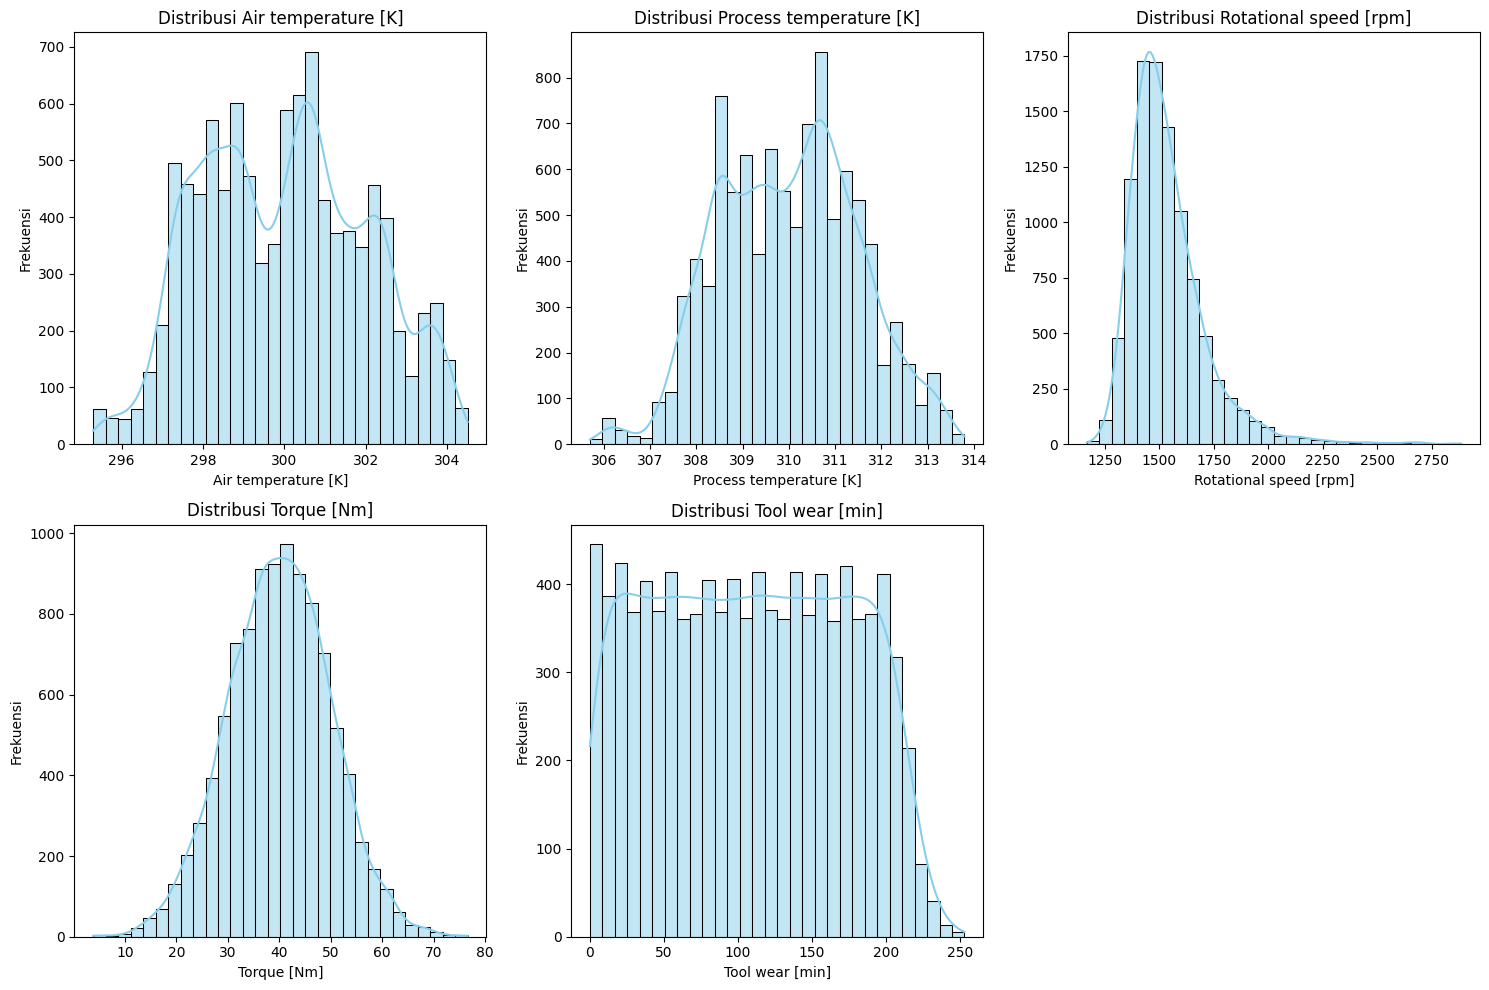

/tmp/ipython-input-3215628140.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='viridis')


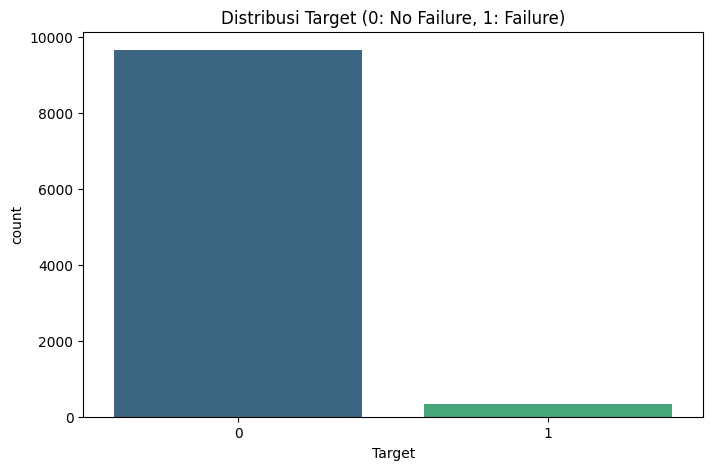

/tmp/ipython-input-3215628140.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Failure Type', palette='Set2')


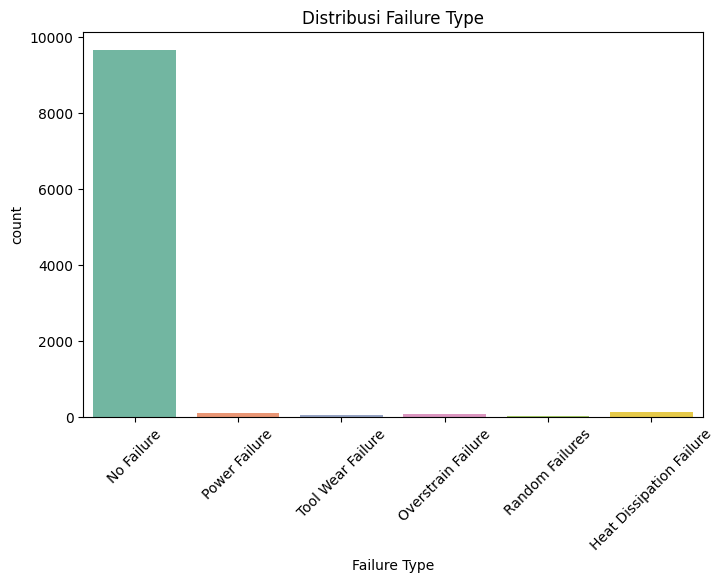

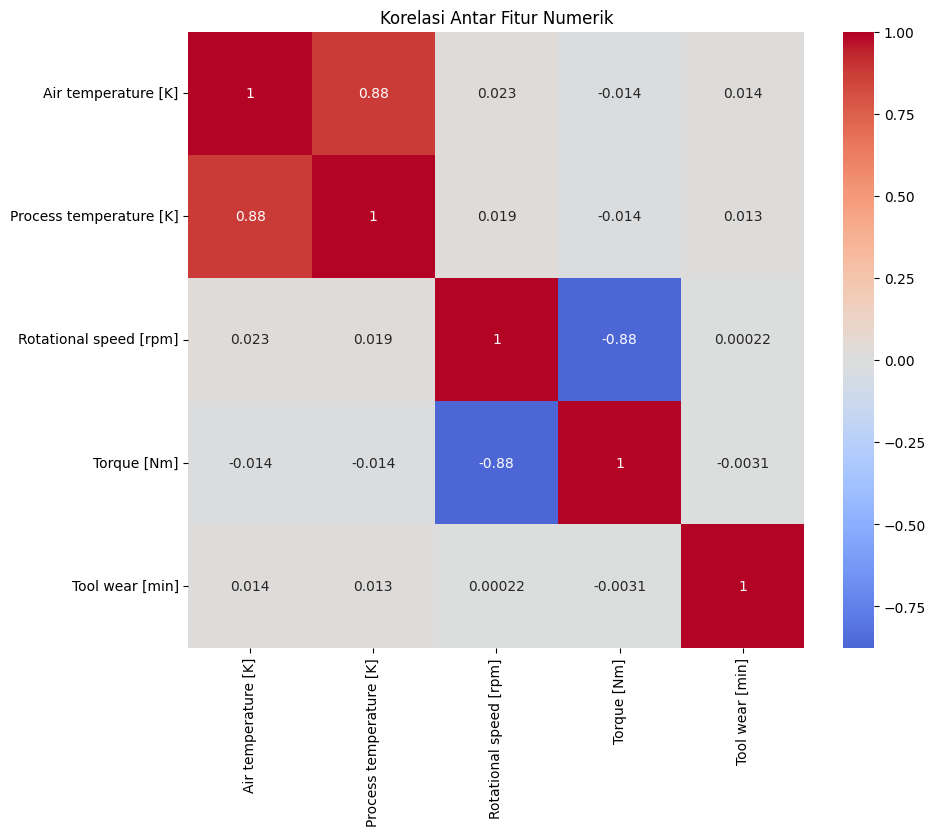

In [ ]:
print("\nStatistik Deskriptif:")
print(df.describe())

# b. Visualisasi Distribusi Numerik
numeric_cols = ['Air temperature [K]', 'Process temperature [K]',
                'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# c. Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Target', palette='viridis')
plt.title('Distribusi Target (0: No Failure, 1: Failure)')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Failure Type', palette='Set2')
plt.title('Distribusi Failure Type')
plt.xticks(rotation=45)
plt.show()

# d. Korelasi
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()


3.1 Menangani Missing Values
Missing values per kolom:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
Missing values setelah penanganan:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

3.2 Menghapus Data Duplikat
Jumlah baris duplikat: 0
Dataset setelah hapus duplikat: (10000, 10)

3.3 Deteksi dan Penanganan Outlier (IQR Method)
Jumlah outlier per kolom (sebelum penanganan):
  Air temperature [K]: 0
  Process temperature [K]: 0
  Rotational speed [rpm]: 418
  Torque [Nm]: 69
  Tool 

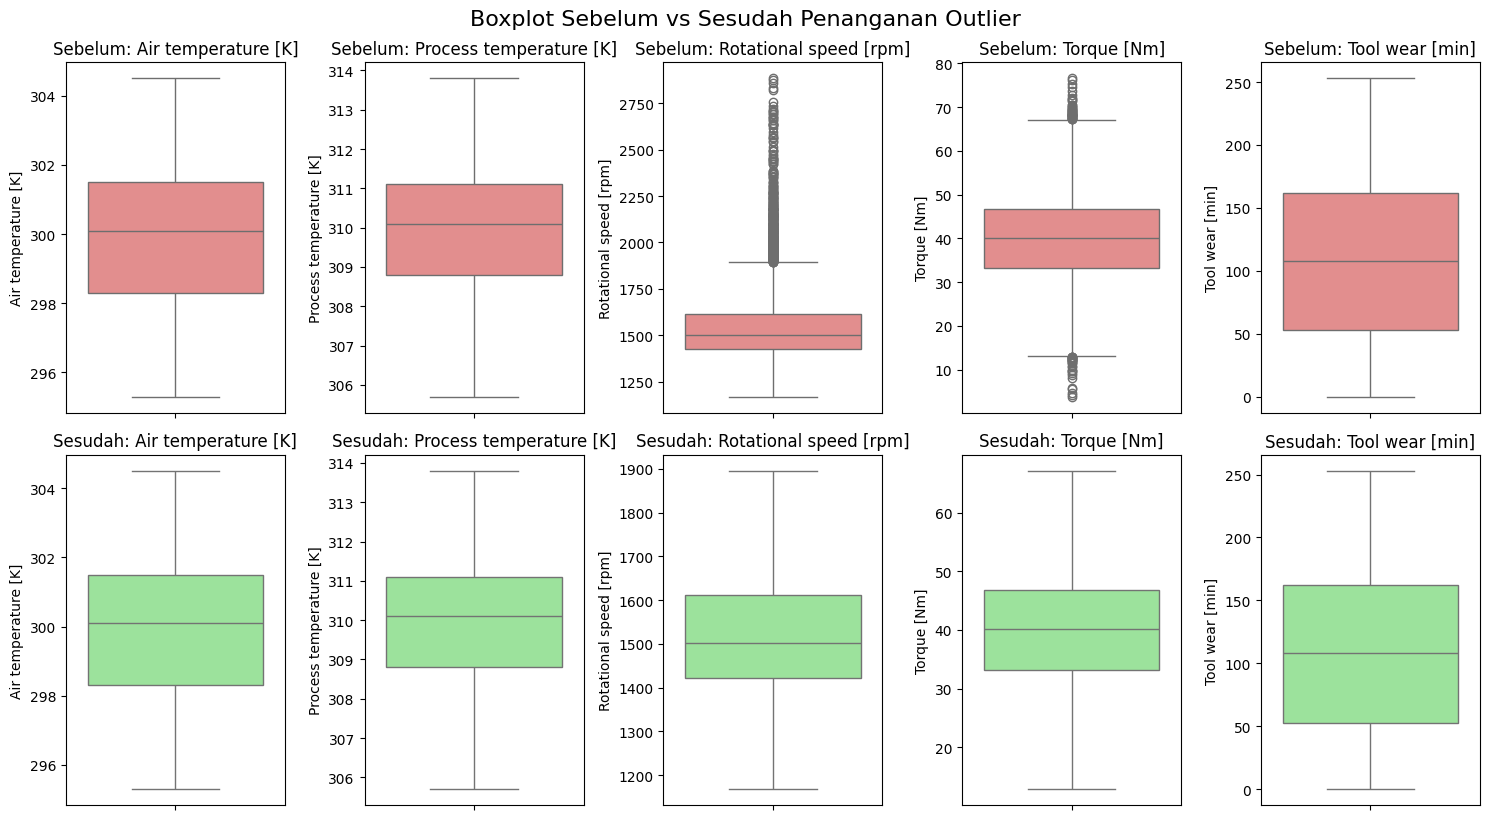

In [ ]:
# Salin dataset untuk preprocessing
df_clean = df.copy()

# 1. Menangani Missing Values
print("\n3.1 Menangani Missing Values")
print("Missing values per kolom:")
print(df_clean.isnull().sum())

# Jika ada missing values → isi dengan median (numerik) / mode (kategorikal)
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in ['Type', 'Failure Type']:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print("Missing values setelah penanganan:")
print(df_clean.isnull().sum())

# 2. Menghapus Data Duplikat
print("\n3.2 Menghapus Data Duplikat")
duplicates = df_clean.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
df_clean.drop_duplicates(inplace=True)
print(f"Dataset setelah hapus duplikat: {df_clean.shape}")

# 3. Deteksi & Penangani Outlier (menggunakan IQR)
print("\n3.3 Deteksi dan Penanganan Outlier (IQR Method)")

outlier_info = {}
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outlier_info[col] = len(outliers)

    # Ganti outlier dengan batas (winsorizing)
    df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)

print("Jumlah outlier per kolom (sebelum penanganan):")
for col, count in outlier_info.items():
    print(f"  {col}: {count}")

# Visualisasi Boxplot sebelum & sesudah
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f"Sebelum: {col}")
    plt.subplot(2, 5, i+5)
    sns.boxplot(y=df_clean[col], color='lightgreen')
    plt.title(f"Sesudah: {col}")
plt.tight_layout()
plt.suptitle("Boxplot Sebelum vs Sesudah Penanganan Outlier", y=1.02, fontsize=16)
plt.show()

In [ ]:
# 4. Normalisasi / Standarisasi Fitur
print("\n3.4 Normalisasi & Standarisasi")

# Standarisasi (mean=0, std=1) → untuk model seperti SVM, NN, LSTM
scaler_std = StandardScaler()
df_clean_std = df_clean.copy()
df_clean_std[numeric_cols] = scaler_std.fit_transform(df_clean[numeric_cols])

# Normalisasi (0-1) → untuk LSTM, Neural Network
scaler_minmax = MinMaxScaler()
df_clean_norm = df_clean.copy()
df_clean_norm[numeric_cols] = scaler_minmax.fit_transform(df_clean[numeric_cols])

print("Standarisasi dan Normalisasi selesai.")


3.4 Normalisasi & Standarisasi
Standarisasi dan Normalisasi selesai.


In [ ]:
# 5. Encoding Data Kategorikal
print("\n3.5 Encoding Data Kategorikal")

# Label Encoding untuk Type (L, M, H)
le_type = LabelEncoder()
df_clean['Type_Encoded'] = le_type.fit_transform(df_clean['Type'])

# One-Hot Encoding untuk Failure Type (jika perlu)
df_clean = pd.get_dummies(df_clean, columns=['Failure Type'], prefix='Failure', drop_first=False)

print("Kategori 'Type' diencode dengan LabelEncoder.")
print("Kategori 'Failure Type' diencode dengan One-Hot Encoding.")


3.5 Encoding Data Kategorikal
Kategori 'Type' diencode dengan LabelEncoder.
Kategori 'Failure Type' diencode dengan One-Hot Encoding.



3.6 Binning (Pengelompokan Data)
Binning selesai: Tool_Wear_Bin, RPM_Bin


/tmp/ipython-input-20263384.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Tool_Wear_Bin', palette='pastel')
/tmp/ipython-input-20263384.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='RPM_Bin', palette='Set3')


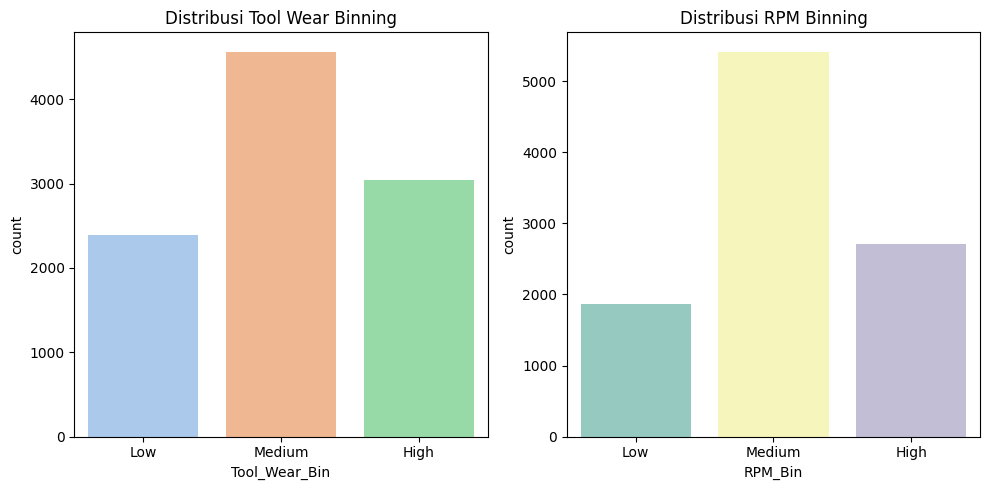

In [ ]:
# 6. Binning (Pengelompokan Data)
print("\n3.6 Binning (Pengelompokan Data)")

# Contoh: Binning Tool Wear menjadi Low, Medium, High
bins = [0, 50, 150, df_clean['Tool wear [min]'].max()]
labels = ['Low', 'Medium', 'High']
df_clean['Tool_Wear_Bin'] = pd.cut(df_clean['Tool wear [min]'], bins=bins, labels=labels, include_lowest=True)

# Binning Rotational Speed
bins_rpm = [0, 1400, 1600, df_clean['Rotational speed [rpm]'].max()]
labels_rpm = ['Low', 'Medium', 'High']
df_clean['RPM_Bin'] = pd.cut(df_clean['Rotational speed [rpm]'], bins=bins_rpm, labels=labels_rpm, include_lowest=True)

print("Binning selesai: Tool_Wear_Bin, RPM_Bin")

# Visualisasi Binning
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df_clean, x='Tool_Wear_Bin', palette='pastel')
plt.title('Distribusi Tool Wear Binning')

plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='RPM_Bin', palette='Set3')
plt.title('Distribusi RPM Binning')
plt.tight_layout()
plt.show()


In [ ]:
# Simpan dataset yang sudah diproses
df_clean.to_csv('processed_dataset.csv', index=False)
print("✅ Dataset telah disimpan")

✅ Dataset telah disimpan'.
